# Homework #5
Josh Cohen

In [1]:
import numpy as np
import sympy as sym
%matplotlib notebook
from matplotlib import pyplot as plt
from scipy.optimize import minimize
from scipy.integrate import solve_ivp, solve_bvp

## Problem 1
Show that the STM solves the ODE $\dot{x} = Ax$ with $x(0) = x_0$ and $A = \begin{bmatrix} -1 & 0 \\ 1 & 2 \end{bmatrix}$ and $x_0 = \begin{bmatrix} 1 \\ 1 \end{bmatrix} $

Turn on solution for $x(0.5)$ and $\phi(0.5)x_0$ 

In [2]:
t, t0 = sym.symbols('t t_0')
x0 = sym.Function('x_0')(t)
x1 = sym.Function('x_1')(t)
phi0 = sym.Function('phi_0')(t, t0)
phi1 = sym.Function('phi_1')(t, t0)
phi2 = sym.Function('phi_2')(t, t0)
phi3 = sym.Function('phi_3')(t, t0)
A0 = sym.Function('A_0')(t)
A1 = sym.Function('A_1')(t)
A2 = sym.Function('A_2')(t)
A3 = sym.Function('A_3')(t)

x = sym.Matrix([x0, x1])
phi = sym.Matrix([[phi0,phi1],[phi2,phi3]])
A = sym.Matrix([[A0, A1],[A2, A3]])

In [3]:
A = sym.Matrix([[-1,0],[1,2]])
xdot = A * x
phidot = A *phi
xdot_lam = sym.lambdify([t,x], xdot)
phidot_lam = sym.lambdify([t, phi], phidot)
# qdot = sym.lambdify([t, [*x, *phi]], sym.Array([xdot, phidot]))

def qdot(t, q):
    x = q[:2]
    phi = q[2:]
    xnew = xdot_lam(t, x)
    phinew = phidot_lam(t, phi)
    return (np.concatenate((xnew.flatten(), phinew.flatten())))

In [4]:
x_init = np.array([1,1])
phi_init = np.eye(2).flatten()

In [5]:
ans = solve_ivp(qdot, (0,1), np.concatenate((x_init, phi_init)), max_step=.01)

In [6]:
t_index_closest = np.where(ans.t > .5)[0][0]

In [7]:
x_ans = ans.y[:2,t_index_closest ]

In [8]:
x_ans

array([0.60532003, 3.43711432])

In [9]:
phi_ans = ans.y[2:, t_index_closest]
print("phi at t = 0.5 and t0 = 0: \n{}".format(phi_ans))

phi at t = 0.5 and t0 = 0: 
[0.60532003 0.         0.70794857 2.72916574]


In [10]:
np.matmul(phi_ans.reshape(2,2), x_init)

array([0.60532003, 3.43711432])

Therefore it can be seen that x(0.5) produced from numerically solving the ODE and from multiplying phi times x_init evaluates to the same thing 

## Problem 2

same deal but start at terminal end of things
Show that the STM solves the ODE $\dot{p} = Ap$ with $p(0.t) = p_T$ and $A = \begin{bmatrix} -1 & 0 \\ 1 & 2 \end{bmatrix}$ and $p_t = \begin{bmatrix} 1 \\ 1 \end{bmatrix} $

Turn on solution for $p(0)$ and $\phi(0.5)^{-1}p_T$ 

In [11]:
t, t0 = sym.symbols('t t_0')
p0 = sym.Function('p_0')(t)
p1 = sym.Function('p_1')(t)
phi0 = sym.Function('phi_0')(t, t0)
phi1 = sym.Function('phi_1')(t, t0)
phi2 = sym.Function('phi_2')(t, t0)
phi3 = sym.Function('phi_3')(t, t0)
A0 = sym.Function('A_0')(t)
A1 = sym.Function('A_1')(t)
A2 = sym.Function('A_2')(t)
A3 = sym.Function('A_3')(t)

p = sym.Matrix([p0, p1])
phi = sym.Matrix([[phi0,phi1],[phi2,phi3]])
A = sym.Matrix([[-1,0],[1,2]])

pdot = A * p
phidot = A *phi
pdot_lam = sym.lambdify([t,p], pdot)
phidot_lam = sym.lambdify([t, phi], phidot)

def qdot(t, q):
    p = q[:2]
    phi = q[2:]
    pnew = xdot_lam(t, p)
    phinew = phidot_lam(t, phi)
    return (np.concatenate((pnew.flatten(), phinew.flatten())))

In [12]:
p_fin = np.array([1,1])
phi_init = np.eye(2).flatten()

In [13]:
ans = solve_ivp(qdot, (.5,0), np.concatenate((p_fin, phi_init)), max_step=.01)

In [14]:
p_0 = ans.y[:2,-1]
p_0

array([ 1.64872127, -0.05906784])

In [15]:
phi_ans = ans.y[2:, t_index_closest]
phi_ans

array([ 1.64872127,  0.        , -0.42694728,  0.36787944])

In [16]:
np.matmul(phi_ans.reshape(2,2), p_fin)

array([ 1.64872127, -0.05906784])

The conclusion reached above also works when you integrate backwards in time, nifty!

## Problem 3
Compute effort, $u(t)$ that minimizes the cost function $J$ subject to constraint $\dot{x}$ by solving the Two Point Boundary Value Problem.

Plot $x(t)$ and $u(t)$ over time

In [17]:
Q = sym.Matrix([[2,0],[0,0.01]])
R = sym.Matrix([0.1])
P1 = sym.Matrix([[1,0],[0,0.01]])

t, gamma, T = sym.symbols('t gamma T')
x0 = sym.Function('x_0')(t)
x1 = sym.Function('x_1')(t)
z0 = sym.Function('z_0')(t)
z1 = sym.Function('z_1')(t)

x = sym.Matrix([x0, x1])
z = sym.Matrix([z0, z1])

x_fin = sym.MatrixSymbol('x(T)', 2, 1).as_explicit()
z_fin = sym.MatrixSymbol('z(T)', 2, 1).as_explicit()
x_init = sym.Matrix([10,0])
z_init = np.zeros((2,1))

u0 = sym.Function('u_0')(t)
v0 = sym.Function('v_0')(t)

# u1 = sym.Function('u_1')(t)
u = sym.Matrix([u0])
v = sym.Matrix([v0])

In [18]:
cost_integrand = x.T * Q * x + u.T * R * u  
cost_eq = sym.Rational(1,2) * sym.integrate(cost_integrand, (t, 0, 10)) + sym.Rational(1,2) * x_fin.T * P1 * x_fin

In [19]:
A = sym.Matrix([[0,1],[-1.6,-0.4]])
B = sym.Matrix([0,1]) 
#f(x,u)
xdot = A * x + B * u #f

In [20]:
p = sym.Matrix([sym.Function('p_1')(t), sym.Function('p_0')(t)])
p_fin = sym.MatrixSymbol('p_{1}', 2, 1).as_explicit()

pdot = -A.T * p - Q*x

In [21]:
qdot = sym.Matrix([[A, -B * R.inv() * B.T], [-Q, -A.T]]) * sym.Matrix([x,p])
q_init = sym.Matrix([x_init, p_fin])
q = sym.Matrix([x, p])


In [22]:
qdot_lam = sym.lambdify([t, q],qdot)
def qdot(t, q):
    return np.squeeze(qdot_lam(t, q).reshape(4,-1,1))

In [23]:
def bc(x_a, x_b):
    #a = t_0, #b = T
    
    #check x against known inital
#     x_err = np.expand_dims(x_a[:2],1) - np.array(x_init)
    x_err = x_a[:2] - np.squeeze(x_init)
    
#     print(x_err.shape)
    #check p against known final
    x_fin = x_b[:2]
    p_fin = x_b[2:] 
    #p1 = P1.T * x(T)
    p1 = np.matmul(np.array(P1.T), x_fin)
    
#     p_err = np.expand_dims(p_fin - p1,1)
    p_err = p_fin - p1
    
#     print(x_err.shape)
#     print(p_err.shape)
    return np.concatenate((x_err, p_err))
#     return np.squeeze(np.concatenate((x_err, p_err)))

    

In [24]:
tspan = np.linspace(0,10,100)
ya = np.concatenate((np.array([[*x_init, 0,0]]),np.zeros((4, 99)).T)).T
ans = solve_bvp(fun=qdot,bc=bc, x=tspan, y=ya)

In [25]:
p = ans.y[2:]
u = np.matmul(np.array(-R.inv() * B.T), ans.y[2:])
u_TPBVP = u
x0_TPBVP = ans.y[0,:]
x1_TPBVP = ans.y[1,:]
t_TPBVP = ans.x

<IPython.core.display.Javascript object>


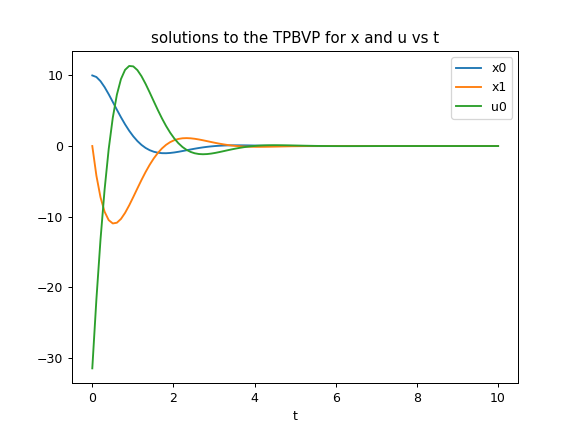

In [26]:
plt.figure()
plt.plot(ans.x, ans.y[0,:])
plt.plot(ans.x, ans.y[1,:])
plt.plot(ans.x,u.T)

plt.legend(["x0", "x1", "u0", "u1"])
plt.xlabel("t")
plt.title("solutions to the TPBVP for x and u vs t")
plt.show()

## Problem 4
Solve the same system as above except use the Riccati equations instead of TPBVP method

In [27]:
P0 = sym.Function("P_0")(t)
P1 = sym.Function("P_1")(t)
P2 = sym.Function("P_2")(t)
P3 = sym.Function("P_3")(t)
P = sym.Matrix([[P0, P1],[P2,P3]])
Pdot = -P * A - A.T * P + P * B * R.inv() * B.T * P - Q
P_fin = sym.Matrix([[1,0],[0,0.01]]) #the real P1
Pdot_lam = sym.lambdify([t, sym.flatten(P)], sym.flatten(Pdot))

In [28]:
ans_P = solve_ivp(Pdot_lam, [10,0], sym.flatten(P_fin), max_step=0.1)

In [29]:
P_t = ans_P.y

P_t_init = ans_P.y[:, -1]
# P_t_init.shape
# x_init.shape

In [30]:
q_init = np.concatenate((np.squeeze(x_init), P_t_init))

In [31]:
xdot = (A - B * (R.inv() * B.T * P)) *  x

In [32]:
q = sym.Matrix([x, P.reshape(4,1)])
qdot = sym.Matrix([xdot, Pdot.reshape(4,1)])
qdot_lam = sym.lambdify([t, q], sym.flatten(qdot))


In [33]:
ans = solve_ivp(qdot_lam, [0,10], q_init, t_eval = t_TPBVP)

In [34]:
P_t = ans.y[2:, :].reshape(2,2,-1)
x_t = ans.y[:2, :].reshape(2,1,-1)
P_t.shape

p = np.zeros((2,1,P_t.shape[-1]))
u = np.zeros(P_t.shape[-1])
for i in range(P_t.shape[-1]):
    p[:,:,i] = np.matmul(P_t[:,:,i], x_t[:,:,i])
    u[i] = np.matmul(np.array(-R.inv() * B.T), p[:,:,i])

In [35]:
u_RE = u
x0_RE = ans.y[0,:]
x1_RE = ans.y[1,:]
t_RE = ans.t

<IPython.core.display.Javascript object>


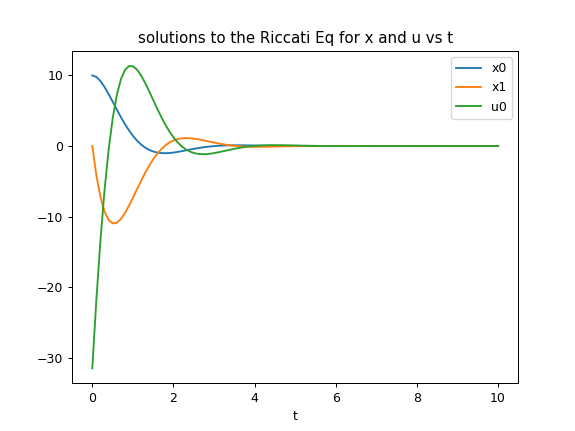

In [36]:
plt.figure()
plt.plot(ans.t, ans.y[0,:])
plt.plot(ans.t, ans.y[1,:])
plt.plot(ans.t, u)
plt.legend(["x0", "x1", "u0", "u1"])
plt.xlabel("t")
plt.title("solutions to the Riccati Eq for x and u vs t")
plt.show()

In [37]:
u_diff = (u_RE - u_TPBVP)
x0_diff = (x0_RE - x0_TPBVP)
x1_diff = (x1_RE - x1_TPBVP)

<IPython.core.display.Javascript object>


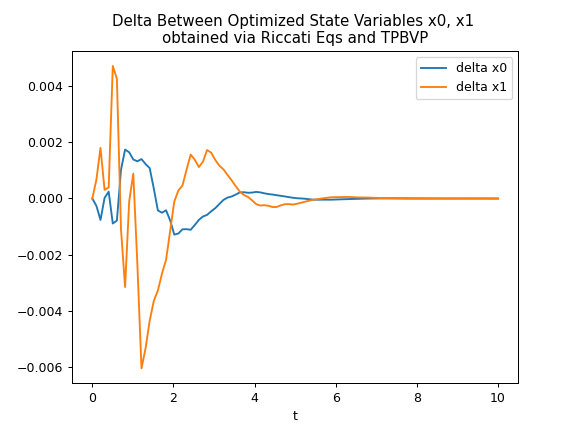

In [38]:
plt.figure()
plt.plot(ans.t, x0_diff)
plt.plot(ans.t, x1_diff)
plt.xlabel("t")
plt.title("Delta Between Optimized State Variables x0, x1 \nobtained via Riccati Eqs and TPBVP")
plt.legend(["delta x0", "delta x1"])
plt.show()

<IPython.core.display.Javascript object>


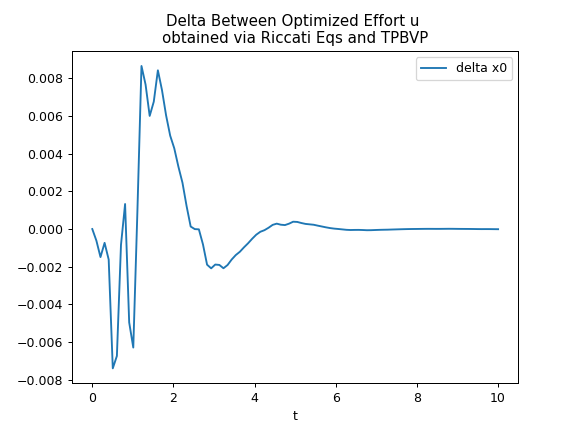

In [39]:
plt.figure()
plt.plot(ans.t, u_diff.T)
plt.xlabel("t")
plt.title("Delta Between Optimized Effort u \nobtained via Riccati Eqs and TPBVP")
plt.legend(["delta x0", "delta x1"])
plt.show()